_Salih Can Yılmaz_ - _160101005_

# __Projenin Amacı__

Bu projede amaç RFM* değerleri göz önüne alınarak müşterileri kümelere bölmektir. Bu sayede hedef müşterileri belirleme işlemi daha verimli hale getirilebilir. Kümeleme işlemi için k-ortalamalar(k-means) yöntemi kullanılacaktır.

*RFM(ing. kıs. receny frequency monetary)

<br>

## __RFM Analizi__

RFM analizi, Recency(Güncellik), Frequency(Frekans), Monetary(Tutar) kelimelerinin baş harflerinden oluşup, bu üç metrik göz önüne alınarak yapılır. Müşterilerin mevcut durumunun analiz edilip, bu skorlara göre segmentlere ayrılmasına yardımcı olur. Bu analiz yönteminde müşterinin geçmiş alışveriş alışkanlıklarının yanı sıra, yaptıkları alışveriş sayısına ve bu alışverişlerin harcama miktarına bağlı olarak müşterilerin muhtemel satın alma eğilimlerinin belirlenmesi amaçlanır.

RFM analizi yapabilmek için tüm müşterilerin satın alma geçmişini içeren bir veritabanına ihtiyaç olacaktır. Bu veritabanı, müşterilerin yaptığı tüm alışveriş işlemlerini içeren bir dosya da olabilir.

Bkz : https://en.wikipedia.org/wiki/RFM__(market_research)

## __K-ortalamalar Kümeleme Yöntemi__

K-ortalamalar yöntemi denetimsiz(unspervised) bir makine öğrenmesi yöntemidir. Yöntemin amacı, etiketsiz verileri araştırmacı tarafından belirlenen sayıda kümelere gruplamaktır. Sonuçta, k-ortalamalar yöntemi ile gözlemler, kümeler arasında değişkenlik en büyük, kümeler içi değişkenlik en küçük olacak şekilde farklı kümelere yerleştirilir. Bu yöntemde küme sayısı, en az 2 ve en fazla gözlem sayısına eşit olacak şekilde belirlenir.<br><br>


### __Küme Sayısının Belirlenmesi__

- Yaklaşımlardan en yaygını $$k = \sqrt{n/2}$$ şeklinde k değerini hesaplamaktır. n birim sayısını ifade eder. Küçük örneklemler için kullanılan bu yöntem örneklem büyüklüğünün büyük olması durumunda iyi sonuçlar vermemektedir.<br>

- Marriot tarafından önerilen diğer bir yöntemde ise W grup içi kareler toplamı matrisi olmak üzere küme sayısı $$M = k^{2} |W|$$ şeklinde hesaplanır. M değerini minimum yapan k değeri uygun küme sayısı olarak alınmaktadır.<br>

- Biz bu projede küme sayısını belirlemek için dirsek yöntemini kullanacağız(elbow method). Bu yöntemle ilgili aşağıdaki bölümlerde daha ayrıntılı bilgi verilecektir.<br>

### __Algoritma__



- Bu yöntemde daha başlangıçta belli sayıdaki küme için toplam ortalama hatayı minimize etmek amaçlanır. <br>

- N boyutlu uzayda N örnekli kümelerin verildiğini varsayalım. Bu uzay C1, C2,...,Ck biçiminde k adet kümeye ayrılsın. O zaman $$\sum_{}^{}n_{k} = N{k=1,2,...,k}$$ olmak üzere Ck kümesinin ortalama vektörü Mk şu şekilde hesaplanır.
<center> $$M_{k} = \frac{1}{n_{k}}  \sum_{i=1}^{n_{k}} X_{ik}$$ <center> 
    
- Burada Xk hata değeri Ck kümesine ait olan i. örnektir. <br>
    
- Ck kümesi için hata-kare, her bir Ck örneği ile onun merkezi(centroid) arasındaki Öklid uzaklıkları toplamıdır. <br>
    
- Bu hataya 'küme içi değişme' adı da verilir.<br>
    
- Küme içi değişmeler şu şekilde hesaplanır. $$ e_{i}^{2} = \sum_{i=1}^K ({X_{ik} - M_k})^2$$

    
- K kümesini içeren bütün kümeler uzayı için hata-kare, küme içindeki değişmelerin toplamıdır. Şu şekilde hesaplanır:
$$E_{k}^{2} = \sum_{i=1}^{n_k} e_k^2$$

-  Hata-kare kümeleme yönteminin amacı verilen K değeri için Ek^2 değerini minimize eden K kümelerini bulmaktır. <br>
    
- O halde k-ortalamalar algoritmasında Ek^2 değerinin bir önceki iterasyona göre azalması beklenir.<br>
    
- K-Ortalamalar algoritmasında aşağıdaki adımlar izlenir:<br>
    
    1-) Her bir kümenin merkezi(centroid) belirlenir. Bu merkezler M1, M2,...,Mk biçimindedir.<br>
    
    2-) e1,e2,...,ek küme içi değişmeler hesaplanır. Bu değişmelerin toplamı olan Ek^2 değeri bulunur.<br>
    
    3-) Mk merkez değerleri ile gözlem değerleri arasındaki uzaklıklar hesaplanır. Bir gözlem değeri hangi kümenin<br>
    
    merkezine yakın ise o küme içine dahil edilir.<br>
    
    4-) Yukarıdaki 2.ve 3. adımlar kümelerde değişiklik olmayıncaya kadar devam ettirilir.(Ben kendi algroitmamı<br> 
    
    uygularken durdurma kriteri olarak maksimum iterasyon değeri de koydum.)
    

# __Veri Seti Hakkında__

_Verinin alındığı kaynak :_ https://www.kaggle.com/hellbuoy/online-retail-customer-clustering


Bu veri seti, İngiltere merkezli bir online perakende satış şirketinin 01/12/2010 ve 09/12/2011 tarihleri arasinda gerçekleşen tüm alışveriş işlemlerini(transaction) içermektedir. Şirket genel olarak hediyelik eşya satmaktadır. Müşterilerinin çoğunluğunu toptancılar oluşturmaktadır.


## Öznitelikler ve açıklamaları

__InvoiceNo:__ Fatura numarası. Nominal, 6 haneli tümleşik, eşsiz olarak her alışveriş işlemine atanmış olan numara. Eğer bu kod 'c' harfi ile başlıyorsa işlem iptal edilmiş anlamına gelmektedir.<br>

__StockCode:__ Ürün(eşya) kodu. Nominal, 5 haneli tümleşik, tüm ürünlere eşsiz olarak atanmış olan numara.<br>

__Description:__ Ürün(eşya) adı. Nominal.<br>

__Quantity:__ Alışveriş işlemi başına her ürününün adedi. Nümeriktir.<br>

__InvoiceDate:__ Fatura tarih ve saati. Nümeriktir.<br>

__UnitPrice:__ Sterling cinsinden ürünlerin birim fiyatı. Nümeriktir.<br>

__CustomerID:__ Nominal, 5 haneli tümleşik, eşsiz olarak her müşteriye atanmış olan numara.<br>

__Country:__ Ülke ismi. Nominal, her müşterinin ikamet ettiği ülkenin adı.<br>


# __Keşifçi Veri Analizi__

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns #Veri gorsellestirme icin
import matplotlib.pyplot as plt #Veri gorsellestirme icin
import sklearn #Kendi Algoritmami Sklearn ile Karsilastirmak icin
from sklearn.cluster import KMeans #Kendi Algoritmami Sklearn ile Karsilastirmak icin
from sklearn.metrics import silhouette_score #Ortalama siluet degerini hesaplamak icin
import random 

In [2]:
#read_csv metoduna encoding bilgisi verilmeden veri okunamıyor
data = pd.read_csv("OnlineRetail.csv", sep=",", encoding="ISO-8859-1", header=0)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Verimizde 541909 kayıt ve 8 kolon bulunmaktadır.

In [5]:
data.shape

(541909, 8)

In [6]:
df_describe = data.drop(["CustomerID"], axis = 1)
df_describe.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


Veri setindeki kolonlar(öznitelikler) ile ilgili bilgileri inceleyelim. "pandas" kütüphanesine ait "info()" metoduyla kolonların tiplerini, eksik değerler olup olmadığını, eksik varsa hangi kolonda ne kadar eksik olduğunu inceleyebiliriz.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# __Veri Temizleme__

Görüldüğü üzere verimizde Description ve CustomerID kolonlarında eksikler var. Eksik veriye saip olan kayıtların tüm kayıtlara göre oranına bakıp uygunsa bu satırları veri setinden çıkaralım.

In [9]:
na_rate = round(100*(data.isnull().sum())/len(data), 2)
na_rate

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
data = data.dropna()

In [11]:
data.isna().values.any()

False

# __Veri Hazırlama__

__RFM metoduna göre müşterileri 3 faktöre göre analiz edeceğiz :__ <br>

- Güncellik (Recency) : Son satın alımdan bu yana geçen gün süresi. <br>

- Frekans (Frekans) : Alışveriş sayısı <br>

- Tutar (Monetary)       : Müşterinin toplam harcaması <br>

__Öncelikle bu özellikleri verisetinden çıkartalım :__<br>

Müşterinin satın alma sayılarını bulmak için müşterileri id'lerine göre gruplayıp tüm alışverişlerini toplayalım.

In [12]:
df_frequency = data.groupby('CustomerID')['InvoiceNo'].count()
df_frequency = df_frequency.reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Müşterilerin toplam harcama miktarını bulmak için alışverişleriş kayıtlarındaki satın alma adetleri ve birim fiyatlarını çarpıp yeni bir kolona yerleştirelim. Daha sonra müşterileri id'lerine göre gruplayıp bu değerleri toplayalım.

In [13]:
data['Amount'] = data['Quantity']*data['UnitPrice']
df_amount = data.groupby('CustomerID')['Amount'].sum()
df_amount = df_amount.reset_index()
df_amount.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


RFM analizinde kullanılan 3. değer olan güncellik değerini bulalım.

In [14]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

max_date = max(data['InvoiceDate'])

data['Diff'] = max_date - data['InvoiceDate']


df_recency = data.groupby('CustomerID')['Diff'].min()
df_recency = df_recency.reset_index()


df_recency['Diff'] = df_recency['Diff'].dt.days

df_recency.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


Son olarak bulduğumuz tüm değerleri tek bir tabloda birleştirelim

In [15]:
rfm = pd.merge(df_frequency, df_amount, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Frequency,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [16]:
rfm = pd.merge(rfm, df_recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency']
rfm.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


Artık ihtiyacımız kalmadığı için CustomerID sütununu verisetiden çıkartalım.

In [17]:
rfm.drop(['CustomerID'], axis = 1, inplace=True)

## __Uç değer tespiti__

Text(0.5, 0, 'Değişkenler')

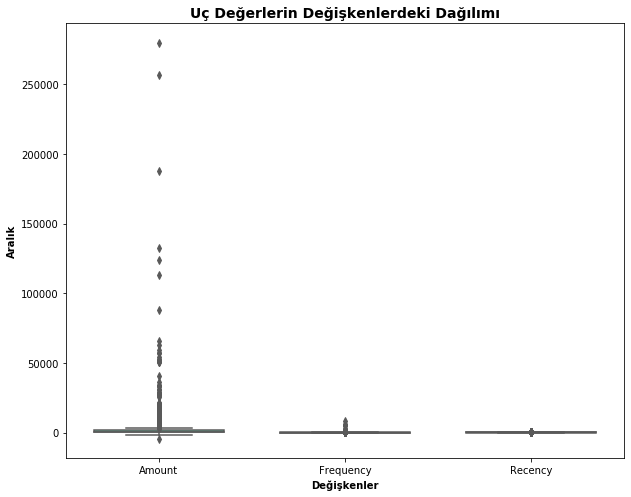

In [18]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Uç Değerlerin Değişkenlerdeki Dağılımı", fontsize = 14, fontweight = 'bold')
plt.ylabel("Aralık", fontweight = 'bold')
plt.xlabel("Değişkenler", fontweight = 'bold')

In [19]:
# Amount özniteliği için uç değerleri kaldırlarım.
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Recency özniteliği için uç değerleri kaldırlarım.
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Frequency özniteliği için uç değerleri kaldırlarım.
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [20]:
def ZNormalizasyon(df):
    return  (df - df.mean())/ df.std()

In [21]:
# Öznitelikleri normalize edelim

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]
rfm_df_scaled = ZNormalizasyon(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [22]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723654,-0.752800,2.301343
1,1.731416,1.042345,-0.906360
2,0.300093,-0.463582,-0.183637
3,0.277485,-0.044715,-0.738055
4,-0.533172,-0.603204,2.142938


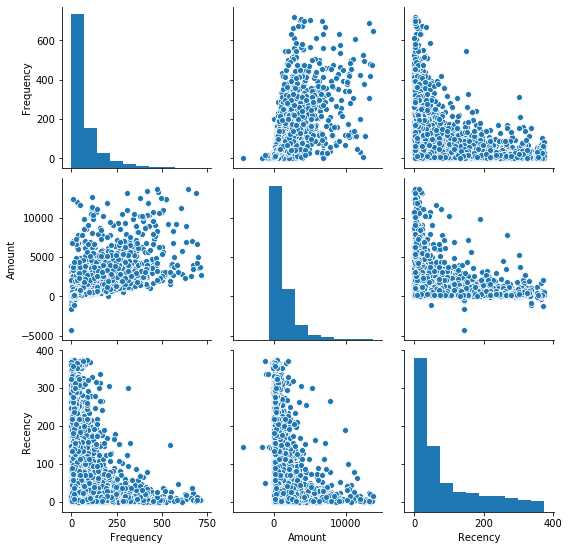

In [23]:
sns.pairplot(rfm);

In [24]:
rfm["Frequency"].value_counts()

1      79
6      78
10     74
12     72
7      72
       ..
489     1
481     1
461     1
457     1
671     1
Name: Frequency, Length: 428, dtype: int64

In [25]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,4293.0,77.483578,100.270448,1.00,17.00,40.00,97.00,718.00
Amount,4293.0,1270.411464,1755.551155,-4287.63,289.36,632.97,1518.43,13677.59
Recency,4293.0,92.548567,101.006845,0.00,17.00,50.00,145.00,373.00


# __Algoritmanın Uygulanması__  

(__Kodların olduğu kısım 13.sayfada başlamaktadır.__)

Algoritma uygulanırken yukarıda da alıntıladığım, ders notlarımızdaki anlatımı göz önüne aldım. Algoritmada tekrar edilen işlemleri metotlar içine alarak hem gereksiz kod yazımının önüne geçmiş oldum hem de kodları daha okunaklı hale getirerek algoritmanın uygulanmasını basitleştirmiş oldum. "K_Ortalamalar" isimli bir sınıf oluşturup metotlarımı bu sınıfta tutmayı uygun gördüm. Bu sayede daha düzenli bir yapı oluşturdum ve algoritma ile ilgili bilgilerin sınıf içinde tutulmasını sağladım. Metotların işlevlerini ve aldıkları parametreleri aşağıda açıkladım.

<br><br>

__fit(self, k, max_iter, dset, verbose = True)__


- k : Küme sayısı

- max_iter : Maximum iterasyon sayısı

- dset : Üzerinde kümeleme yapılacak veri seti. Tipi pandas dataframe ya da numpy array olabilir.

- verbose : Algoritma calısırken çıktı üretsin mi? Öntanımlı değeri 'True'dur. 

Tüm algoritmanın çalışmasını sağlayıp küme etiketlerini döndüren ana metottur. K-ortalamalar algoritmasını kullanmak isteyen kullanıcının sınıf oluşturdukdan sonra bu metodu çalıştırması gerekir.<br> <br>
Öncelikle dset parametresinin tipi pandas dataframe ise algoritma numpy ile çalıştığından tip dönüşümü gerçekleştirilir. Daha sonra başlangıç adımı için verisetindeki gözlemler rastgele kümelere ayrılır. "etiketler" dizisinde gözlemlerin veri setindeki indisine karşılık gelecek şekilde küme etiketleri tutulur ve algoritmanın yinelemeli kısmına geçilir.<br><br> 
"while" döngüsündeki "degisim" değişkeni her iterasyonda "False" değerini alır ve o iterasyonda kümelerde herhangi bir eleman değişikliği olduysa değeri True yapılır. "iterasyon" değişkeninin değeri her iterasyonda 1 artırılır. Kümelerde değişim olmadıysa ya da iterasyon sayısı maksimuma ulaştıysa döngü sonlandırılır.<br><br>
Her iterasyonda öncelikle küme merkezleri hesaplanır ve sınıfa ait centroids listesine kaydedilir. Bu işlem try-except yapısına alınmıştır çünkü k değeri yüksek verildiğinde baştaki dağılımlara göre bazen bir kümenin hiç elemanı kalmamaktadır. Bu da ortalama formülünde 1/n ifadesinin 0'a bölünme hatası üretmesine sebep olur. Bu durumda fit metodu aynı parametrelerle tekrar çağrılır.<br><br>
Daha sonra hata-kareler hesaplanır ve sınıfa ait hataHistory listesine kaydedilir. Bu liste kümelerin hata-kare değerinin her iterasyonda nasıl değiştiğini gözlemlemek ya da en son durumdaki hataya ulaşmak gibi amaçlarla kullanılabilir. Sonrasında her bir gözlemin centroidler ile arasındaki mesafeler bir listeye yazılır ve en yakın kümenin etiketi alınır. Eğer bu etiket, gözlemin mevcut küme etiketinden farklıysa gözlem o kümeye atılır ve "degisim"in değeri True yapılır. Durdurma kriteri sağlandığında döngü biter. Metot, etiket değerlerini çıktı olarak döndürür.

__K_GetOrtalama(self, k, dset, etiketler)__

Küme elemanlarının ortalamasını alarak her küme için bir merkez noktası değeri döndürür.

- etiketler : Gözlemlerin hangi kümeye ait olduklarını ifade eden etiketlerin tutulduğu numpy dizisi.

__K_KumeIci(self, dsetC, centroid)__

Küme elemanlarının centroid ile arasındaki öklid mesafelerinin karelerinin toplamlarını hesaplayarak küme içi değişim değerini döndürür.

- dsetC : Küme içi değişimi hesaplanacak olan kümeye ait elemanların bulunduğu numpy dizisi.

- centroid : Küme içi değişimi hesaplanacak olan kümeye ait merkez noktasının(centroid) koordinatlarının bulunduğu liste

__K_HataKare(self, k, dset, centroids, etiketler)__

Tüm küme içi değişim değerlerini toplayarak toplam hata-kare değerini döndürür.

- centroid :  Kümelere ait merkez noktalarının bulunduğu liste

__K_Oklid(self, a, b)__

Verilen a, b değerleri arasındaki öklid mesafesini döndürür.

__Fikirler__

Algoritmada değişiklik yapılması mümkün olan birkaç noktayı belirtmek isterim. 
İlk olarak mevcut algoritmada önce değerler rastgele kümelere dağıtılıyor. Daha sonra bu kümelerin ortalamaları hesaplanıyor. Bu sebeple ilk adımdaki küme ortalamaları birbirine çok yakın oluyor ve bu durum bazen kümeleme işleminde sıkıntılar doğruabiliyor. Başlangıçta küme merkezlerini belirlemek için aşağıdaki kodu yazmıştım. Bu kod küme merkez koordinatlarını rastgele oluşturuyordu ve bu merkezler birbirlerine daha uzak oluyordu. Ancak daha sonra algoritma çalışırken ilk adımda hata hesaplanırken kümelerin henüz elemanı olmadığından birkaç işlem daha yapmak gerekiyordu. Bu yüzden şimdilik bu halde bıraktım.
<br><br>
Buna ek olarak hata hesaplanırken ve gözlemler ile kümeler arasındaki mesafelere bakılırken benzer işlemler yapılıyor. Tam olarak notlarımızdaki algoritma adımlarına uygun olsun diye bu halde bıraktım. Ancak algoritma, gözlemler ile kümeler arasındaki mesafelere bakarken aynı zamanda hata değerini de hesaplayacak halde yazılırsa daha hızlı çalışır.
<br><br>
Sonuç olarak ilerleyen dönemlerde bu proje üzerinde geliştirmeler yapmayı ve bu kodları açık hale getirmeyi planlıyorum.

In [26]:
# def K_Rastgele_Centroid(k, dset, centroids):
#     for i in range(k): #centroidleri random ata
#         rand_centroid = []
#         for j in range(dset.shape[1]):
#             min_val = min(dset[:,j])
#             max_val = max(dset[:,j])
#             rand_centroid.append(float(np.random.random_sample(1)*(max_val-min_val) + min_val))  
#         centroids.append(rand_centroid)    
#     return centroids

In [27]:
class K_Ortalamalar():
    def __init__(self):
        self.hataHistory = []
        self.Centroids = []
        
    def K_GetOrtalama(self, k, dset, etiketler):
        centroids = []
        for i in range(k):        
            centroids.append((1/(np.argwhere(etiketler == i)).shape[0]) * np.sum(dset[np.argwhere(etiketler == i)], axis = 0))
        return centroids
        
    def K_KumeIci(self, dsetC, centroid):
        return np.sum(np.square(dsetC - centroid)) 
    
    def K_HataKare(self, k, dset, centroids, etiketler):
        KumeIciDegisimler = []
        for i in range(k):
            KumeIciDegisimler.append(self.K_KumeIci(dset[np.argwhere(etiketler == i)], centroids[i]))
        return np.sum(KumeIciDegisimler)
    
    def K_Oklid(self, a, b):   
        return np.sqrt(np.sum(np.square(a-b))) 
    
    def fit(self, k, max_iter, dset, verbose = True):
        
        if(type(dset) == pd.core.frame.DataFrame):
            dset = dset.to_numpy()
        if k <= 1:
            print("k değeri 1'den büyük olmalıdır!")
            return   
        
        self.hataHistory = []
        self.centroids = []
        #baslangic icin rastgele kumelere yerlestir.
        etiketler = np.asarray([random.randint(0,k - 1) for i in range(dset.shape[0])])
        
        degisim = True
        iterasyon = 0
        while(degisim and iterasyon <= max_iter):
            iterasyon += 1
            degisim = False
            centroids = []
            try:
                centroids = self.K_GetOrtalama(k, dset, etiketler)
            except ZeroDivisionError:
                return self.fit(k, max_iter, dset, verbose)
            
            hata_kare = self.K_HataKare(k, dset, centroids, etiketler)
            self.hataHistory.append(hata_kare)
            
            if verbose:
                print(str(iterasyon)+". iterasyon, hata kare : " + str(hata_kare))
                
            
            for i in range(dset.shape[0]):
                dgozlemkume = np.array([])
                for j in range(k):
                    dgozlemkume = np.append(dgozlemkume,self.K_Oklid(dset[i], centroids[j]))
            
                index = np.where(dgozlemkume == np.amin(dgozlemkume))

                if(index[0] != etiketler[i]):
                    etiketler[i] = index[0]
                    degisim = True
                    
        self.centroids = centroids
        self.etiketler = etiketler
      
        return etiketler
        
        
    

## __Küme Sayısının Belirlenmesi__

### __Dirsek Yöntemi__

Dirsek yönteminde(elbow method) öncelikle bir dizi k değeri için veri kümesinde k-ortalamalar yöntemi ile kümeleme yapılır ve her k değeri için hata karelerin toplamı(KHT) hesaplanır. Ardından, her k değeri için KHT'nin çizgi grafiği çizilir. Çizgi grafik bir kol gibi görünüyorsa, koldaki "dirsek" noktası en iyi olan k değerine sahiptir. Amaç, küçük bir KHT'ye sahip, ancak değerini artırdıkça KHT'nin 0 a düşme eğiliminde olduğu bir k bulmaktır. (k veri kümesindeki veri noktalarının sayısına eşit olduğunda KHT 0'dır, çünkü o zaman her veri noktası kendi küme ile kümesinin merkezi arasında bir hata yoktur).

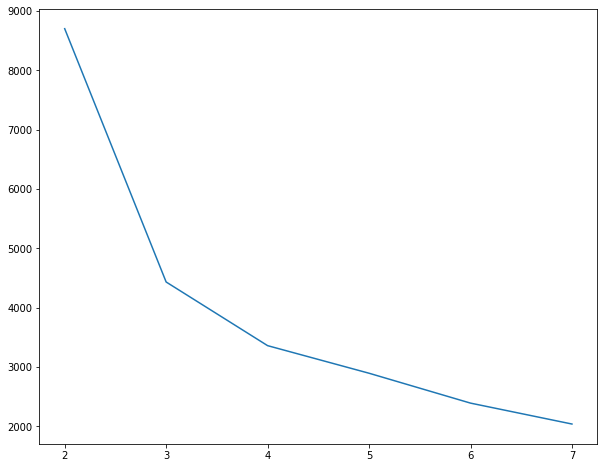

In [28]:
# Elbow-curve/SSD
k_ortalamalar = K_Ortalamalar()  

KHT = []
range_n_clusters = [2, 3, 4, 5, 6, 7]
for num_clusters in range_n_clusters:
    k_ortalamalar.fit(num_clusters, 70, rfm_df_scaled, verbose = False)
    
    KHT.append(k_ortalamalar.hataHistory[-1])
    
# plot the SSDs for each n_clusters
plt.plot(range(2,len(KHT)+2), KHT);

Malesef dirsek yöntemi her zaman iyi çalışmaz; özellikle de veriler çok kümelenmemişse. Şekilde de dirseğe en çok benzeyen nokta k=3 olsa da net bir dirsek seçilememektedir. Dolayısıyla seçilecek en iyi k değerinin ne olduğunu belirlemek için sadece dirsek yöntemini kullanmak yeterli değildir. Bu gibi durumlarda, optimum k'yi belirlemek için siluet skorlarını hesaplamak gibi farklı bir yöntem deneyebiliriz.

### __Siluet Skorlarının Hesaplanması__

$$ siluetskoru = \frac{ p - q}{max(p,q)} $$ 
 
p, veri noktasının bir parçası olmadığı en yakın kümedeki noktalara olan ortalama mesafedir.

q kendi kümesindeki tüm noktalara ortalama küme içi mesafedir.

Siluet skor aralığının değeri -1 ile 1 arasındadır.

1'e yakın bir puan, veri noktasının kümedeki diğer veri noktalarına çok benzediğini,

-1'e yakın bir puan, veri noktasının kümesindeki veri noktalarına benzemediğini gösterir.

In [29]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for num_clusters in range_n_clusters:
   
    k_ortalamalar = K_Ortalamalar()
     
    cluster_labels = k_ortalamalar.fit(num_clusters, 70, rfm_df_scaled, verbose = False)

    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("Kume sayisi={0}, Siluet Skoru = {1}".format(num_clusters, silhouette_avg))

Kume sayisi=2, Siluet Skoru = 0.5411246404292338
Kume sayisi=3, Siluet Skoru = 0.5084896296141933
Kume sayisi=4, Siluet Skoru = 0.48506020563508856
Kume sayisi=5, Siluet Skoru = 0.4641616145566635
Kume sayisi=6, Siluet Skoru = 0.4171016838506355
Kume sayisi=7, Siluet Skoru = 0.4148957166209094


Tüm bu hesaplamalardan sonra elimizdeki bilgilere göre k = 3 seçilmesi uygun görülmüştür.

In [30]:
labels = k_ortalamalar.fit(3, 50,rfm_df_scaled)

print(k_ortalamalar.centroids)

1. iterasyon, hata kare : 12869.557538931658
2. iterasyon, hata kare : 6805.444822563595
3. iterasyon, hata kare : 5225.120064354626
4. iterasyon, hata kare : 4727.382088133532
5. iterasyon, hata kare : 4541.709328947546
6. iterasyon, hata kare : 4477.089696974395
7. iterasyon, hata kare : 4456.026303661725
8. iterasyon, hata kare : 4444.711734696333
9. iterasyon, hata kare : 4436.244116620508
10. iterasyon, hata kare : 4432.925100253095
11. iterasyon, hata kare : 4432.56520202831
12. iterasyon, hata kare : 4432.547872826626
[array([[ 2.06677208,  2.08843394, -0.7013897 ]]), array([[-0.18152777, -0.17918976, -0.47571794]]), array([[-0.50231701, -0.51840567,  1.54194809]])]


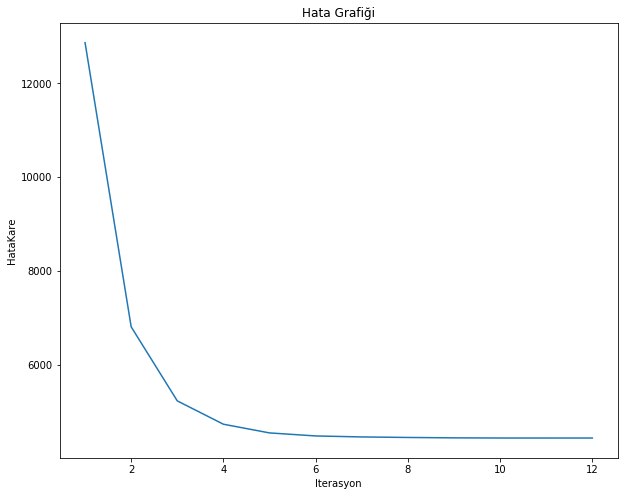

In [31]:
plt.plot(range(1,len(k_ortalamalar.hataHistory)+1),k_ortalamalar.hataHistory)    
plt.xlabel("Iterasyon")
plt.ylabel("HataKare")
plt.title("Hata Grafiği");

In [32]:
rfm['Cluster_Id'] = labels
rfm.head()

,Frequency,Amount,Recency,Cluster_Id
0,2,0.00,325,2
1,182,4310.00,1,0
2,31,1797.24,74,1
3,73,1757.55,18,1
4,17,334.40,309,2


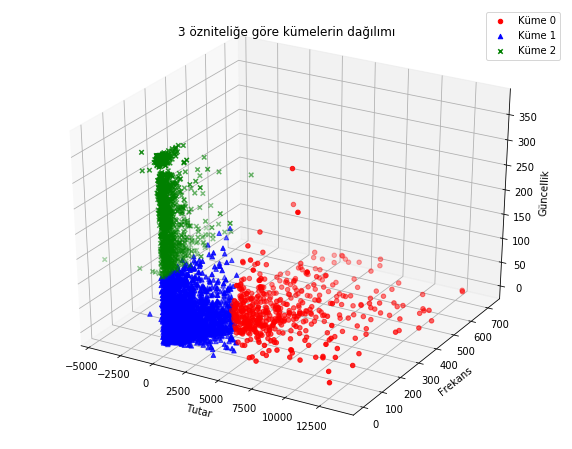

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x0 = (rfm[rfm['Cluster_Id'] == 0]).Amount
y0 = (rfm[rfm['Cluster_Id'] == 0]).Frequency
z0 = (rfm[rfm['Cluster_Id'] == 0]).Recency
x1 = (rfm[rfm['Cluster_Id'] == 1]).Amount
y1 = (rfm[rfm['Cluster_Id'] == 1]).Frequency
z1 = (rfm[rfm['Cluster_Id'] == 1]).Recency
x2 = (rfm[rfm['Cluster_Id'] == 2]).Amount
y2 = (rfm[rfm['Cluster_Id'] == 2]).Frequency
z2 = (rfm[rfm['Cluster_Id'] == 2]).Recency

ax.scatter(x0, y0, z0, c='r', marker='o', label="Küme 0")
ax.scatter(x1, y1, z1, c='b', marker='^', label="Küme 1")
ax.scatter(x2, y2, z2, c='g', marker='x', label="Küme 2")

ax.set_xlabel('Tutar')
ax.set_ylabel('Frekans')
ax.set_zlabel('Güncellik')

plt.legend()
plt.title("3 özniteliğe göre kümelerin dağılımı")
plt.show()

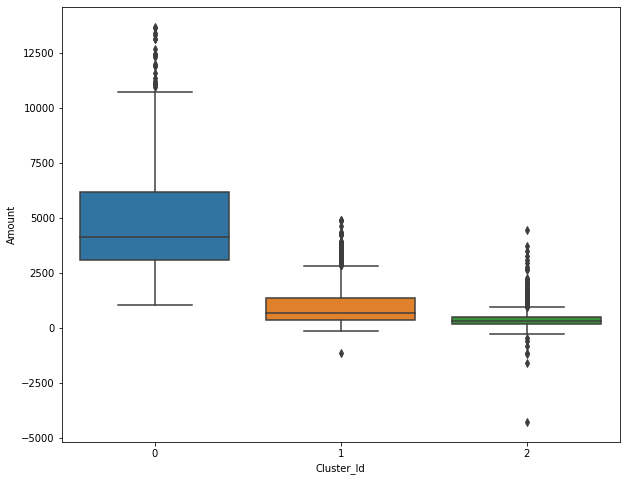

In [34]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm);

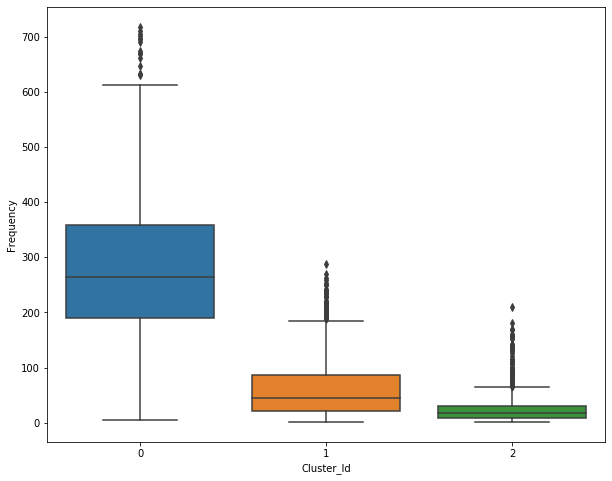

In [35]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm);

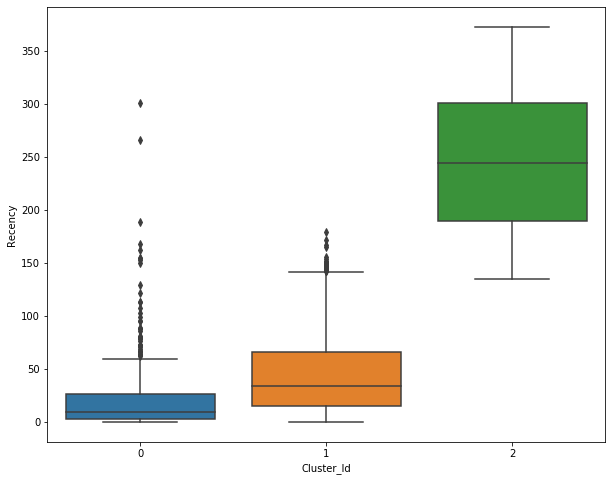

In [36]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm);

# __Sonuçlar__

__Çıkarımlar:__

- Küme Kimliği 0 olan müşteriler, diğer müşterilerle karşılaştırıldığında sık ve yüksek miktarda alışveriş yapan müşterilerdir.

- Küme Kimliği 1'e sahip müşteriler orta sıklıkta ve miktarda alıcıdır.

- Küme Kimliği 2'ye sahip müşteriler yeni alıcı değildir ve bu nedenle iş açısından önemsizdir.

<br>

Not: İsimlendirme kafa karıştırabilir, güncellik değişkeninin değerinin az olması daha yakın tarihte alışveriş yapıldığı anlamına gelir. 



## __Doğrulama__

Aşağıda algoritmanın doğru çalışıp çalışmadığını kontrol etmek için sklearn modülünün hazır kmeans metoduyla da kümeleme yapılmış ve aynı sonuçlara ulaşılmıştır. Küme etiketleri rastgele dağıldığı için birebir aynı değildir ancak oluşan kümeler birbirinin aynısıdır.

In [37]:
rfm.drop(['Cluster_Id'], axis = 1, inplace=True)

In [38]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
 kmeans.labels_

array([0, 2, 1, ..., 0, 1, 1], dtype=int32)

In [40]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Frequency,Amount,Recency,Cluster_Id
0,2,0.00,325,0
1,182,4310.00,1,2
2,31,1797.24,74,1
3,73,1757.55,18,1
4,17,334.40,309,0


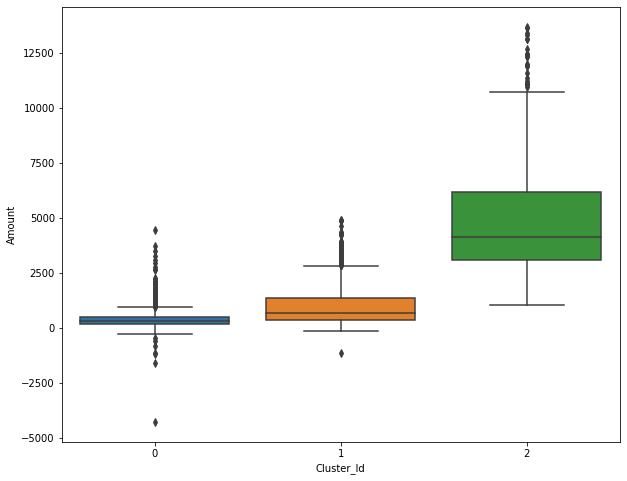

In [41]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm);

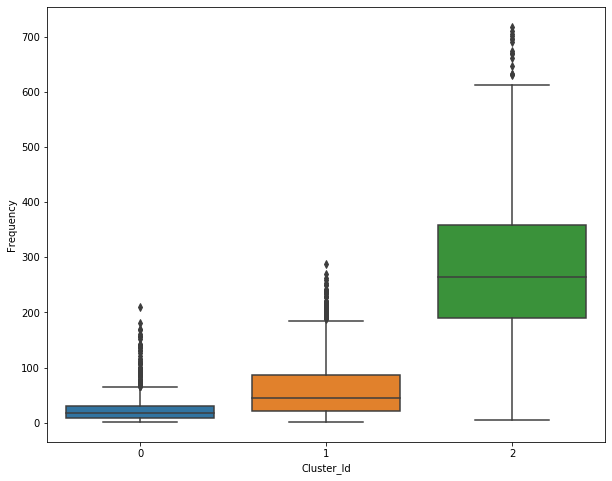

In [42]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm);

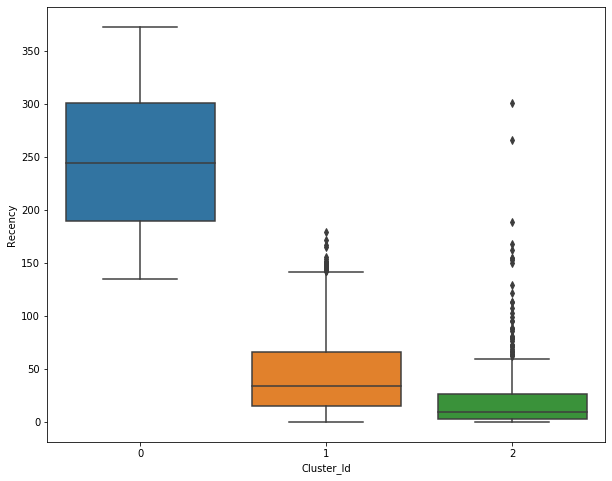

In [43]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm);